
This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the Lab sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 

* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.

* Do the extra credit problems last. This can help you increase your scores

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [2]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [3]:
# Load you data the Boston Housing data into a dataframe
# MEDV.txt containt the median house values and data.txt the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
# Your code here
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')
bdata = pd.concat([pd.DataFrame(data), pd.DataFrame(target)], axis = 1)
bdata.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
bdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2


---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing price and number of rooms per house. Do the following:

(a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) against rooms (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the housing price on the number of rooms per house and the (number of rooms per house) squared.  Show the (curved) regression line in green. 

(c) Interpret your results.

In [4]:
model1 = smf.ols(formula='MEDV ~ RM ', data=bdata).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     452.3
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           4.12e-72
Time:                        13:19:28   Log-Likelihood:                -1678.2
No. Observations:                 506   AIC:                             3360.
Df Residuals:                     504   BIC:                             3369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.5762      2.748    -12.944      0.0

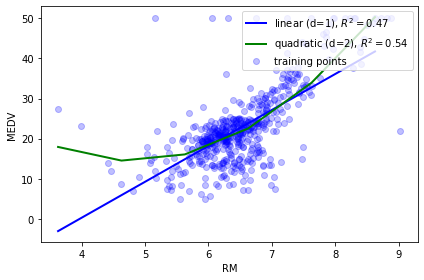

In [5]:
X = bdata[['RM']].values
y = bdata['MEDV'].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regr = LinearRegression()   #reference: https://charleshsliao.wordpress.com/2017/06/16/ransac-and-nonlinear-regression-in-python/
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
 
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
 
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
 
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
 
 
plt.scatter(X, y, label='training points', color='blue', alpha = 0.25)
 
plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)
 
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='green', 
         lw=2)
 
 
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
 
plt.tight_layout()
plt.show()


The R-square of the quadratic line is larger, indicating that the quadratic line fits the data better. From the graph, we can see that the quadratic line fits the data with MEDV>35 & RM <5 more.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against rooms, and draw the five different regression lines in light blue, and the oroginal regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

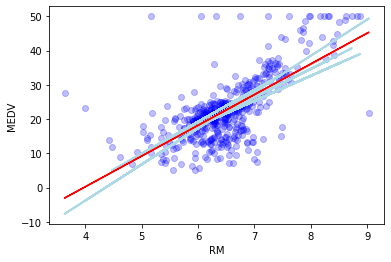

In [104]:
from sklearn.model_selection import KFold

# your code here
X = np.array(bdata['RM']).reshape(-1,1)
y = np.array(bdata['MEDV']).reshape(-1,1)
regr = LinearRegression()

#5-fold cross validation
kf = KFold(n_splits=5)

for train, test in kf.split(X):
    lm = regr.fit(X[train], y[train])
    y_lin_fit = lm.predict(X[test])

    plt.plot(X[test], y_lin_fit, 
            #label='cv', 
            color='lightblue', 
            lw=2)

#original regression
lm = regr.fit(X, y)
y_lin_fit = lm.predict(X)
plt.plot(X, y_lin_fit, color='red') #, label = 'original regression line')

#scatter
plt.scatter(X, y, color='blue', alpha = 0.25)


plt.xlabel('RM')
plt.ylabel('MEDV')
#plt.legend(loc="best")
#plt.gca().legend(('y0','y1'))
plt.show()

The cross-validated lines (light blue) are similar to the original regression line (red).

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [18]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    # initialize the parameters
    start_time = time.time()

    # your code here
    # Define lists to keep track of each function value visited
    alpha = 10 #arbitrary number
    beta = 10 #arbitrary number
    init_cost = 0
    N = len(xvalues)
 
    for i in range(MaxIterations):

        error = alpha + beta*xvalues - yvalues

        alpha -= R * error.sum() / N
        beta -= R * xvalues.dot(error).sum() / N
        cost = (error**2).sum() / (2 * N)

        if abs(cost - init_cost) < 0.000001:
            break
        else:
            init_cost = cost

    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta, i

# example function call

X = np.array(bdata['RM'])
Y = np.array(bdata['MEDV'])

R = [0.01, 0.02, 0.0001]
for r in R:
    print('========== learning rate %s ==========' %r)
    ols = bivariate_ols(X, y, r, 100000)
    print('alpha = %.4f' % ols[0])
    print('beta = %s' % ols[1])
    print('iterations = %s' % ols[2])



========== learning rate 0.01 ==========
Time taken: 0.22 seconds
alpha = -34.7108
beta = 8.828020292015715
iterations = 34473
========== learning rate 0.02 ==========
Time taken: 0.12 seconds
alpha = -34.9644
beta = 8.866674329673275
iterations = 18753
========== learning rate 0.0001 ==========
Time taken: 0.61 seconds
alpha = 4.0195
beta = 2.924328740752573
iterations = 99999


1. The coeficients of learning rate = 0.0001 is significantly different from the other two. 
2. The iteration = 99999 of R=0.0001 infer that it might have not reach minimun before hitting the max iteration because the learning rate is too small. 

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [10]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using TAX and RM as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [11]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.05, MaxIterations=1000):
    # your code here
    start_time = time.time()

    # your code here
    # Define lists to keep track of each function value visited
    N = len(xvalue_matrix[0])
    alpha = 10 #arbitrary number
    beta_array = 10 * np.ones(N)
    init_cost = 0

 
    for i in range(MaxIterations):

        error = alpha + xvalue_matrix.dot(beta_array) - yvalues
        deriv_beta_arr = np.zeros(N)

        for j in range(N):
            loc_arr = np.zeros(N)
            loc_arr[j] = 1
            deriv_beta = error.dot(xvalue_matrix.dot(loc_arr))/len(xvalue_matrix)
            deriv_beta_arr[j] = deriv_beta


        alpha -= R * error.sum() / len(xvalue_matrix)
        beta_array -= R * deriv_beta_arr
        cost = ((alpha + xvalue_matrix.dot(beta_array) - yvalues)**2).sum()/(2*len(xvalue_matrix))


        if abs(cost - init_cost) < 0.000001:
            break
        else:
            init_cost = cost
        
        duration = time.time() - start_time
        
    return alpha, beta_array, i, duration

In [12]:
#driver
X = standardize(np.array(bdata[["TAX", "RM"]]))
y = np.array(bdata["MEDV"])

R = [0.1, 0.01, 0.001]

for r in R:
    ols = multivariate_ols(X, y, r, 100000)
    print('========== learning rate %s ==========' %r)
    print('alpha = %.4f' % ols[0])
    print('beta array = %s' % ols[1])
    print('iterations = %s' % ols[2])
    print('time taken = %.4f' % ols[3])

========== learning rate 0.1 ==========
alpha = 22.5327
beta array = [-2.71845349  5.54164278]
iterations = 107
time taken = 0.0020
========== learning rate 0.01 ==========
alpha = 22.5319
beta array = [-2.71157235  5.54848779]
iterations = 946
time taken = 0.0128
========== learning rate 0.001 ==========
alpha = 22.5281
beta array = [-2.69022063  5.56955549]
iterations = 7882
time taken = 0.0946


1. The three learning rates lead to the same minimun. The coefficients do not change a lot as the learning rate changes.
2. The number of iterations increases as the learning rate gets smaller.
3. Compared with 2.1, the model converges faster. 

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [19]:
# Your code here
X = np.array(bdata[["TAX", "RM"]])
y = np.array(bdata["MEDV"])

R = [0.1, 0.01, 0.001]

for r in R:
    ols = multivariate_ols(X, y, r, 100000)
    print('========== learning rate %s ==========' %r)
    print('alpha = %.4f' % ols[0])
    print('beta array = %s' % ols[1])
    print('iterations = %s' % ols[2])
    print('time taken = %.4f' % ols[3])

/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_32658/3435541686.py:55: RuntimeWarning: overflow encountered in square
  cost = ((alpha + xvalue_matrix.dot(beta_array) - yvalues)**2).sum()/(2*len(xvalue_matrix))
/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_32658/3435541686.py:58: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost - init_cost) < 0.000001:
/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_32658/3435541686.py:54: RuntimeWarning: invalid value encountered in subtract
  beta_array -= R * deriv_beta_arr


========== learning rate 0.1 ==========
alpha = nan
beta array = [nan nan]
iterations = 99999
time taken = 1.1592
========== learning rate 0.01 ==========
alpha = nan
beta array = [nan nan]
iterations = 99999
time taken = 1.1382
========== learning rate 0.001 ==========
alpha = nan
beta array = [nan nan]
iterations = 99999
time taken = 1.1486


Without standardization, the model would not converge, leading to a increasing cost. 

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for TAX and RM). Since there are 5 folds, there will be 5 sets of three coefficients -- report them all in a 5x3 table.

In [20]:
# Your code here
from tabulate import tabulate

#5-fold cross validation
X = np.array(bdata[["TAX", "RM"]])
y = np.array(bdata["MEDV"])
X_norm = standardize(X)

kf = KFold(n_splits=5)
alpha = []
beta1 = []
beta2 = []

for train, test in kf.split(X_norm):
    ols = multivariate_ols(X_norm[train], y[train], 0.01, 100000)
    alpha.append(ols[0])
    beta1.append(ols[1][0])
    beta2.append(ols[1][1])

#print table
columns = ['alpha', 'TAX', 'RM']
Table = np.array([alpha, beta1, beta2]).T
print(tabulate(Table, headers=columns, tablefmt='simple', floatfmt="0.4f"))


  alpha      TAX      RM
-------  -------  ------
23.0378  -3.1370  5.2667
22.2654  -2.7255  4.9139
21.9343  -2.4840  4.5523
22.2202  -3.2539  6.6663
23.2691  -1.5094  6.2077


The coefficients of different model trained by different fold are not very equal, probably because the amount of data in each fold is not enough (about 80 data in each fold).

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [21]:
# Your code here
def compute_rmse(predictions, yvalues):
    temp = list(map(lambda i, j : (i-j)**2, predictions, yvalues))
    rmse = np.sqrt(sum(temp)/len(predictions))
    return rmse

RMSE = []
for train, test in kf.split(X_norm):
    alpha, beta_array, _, _ = multivariate_ols(X_norm[train], y[train], 0.01, 100000)
    y_predict = alpha + X_norm[test].dot(beta_array)
    RMSE.append(compute_rmse(y_predict, y[test]))

print ('========== RMSE for each of the five folds ==========')
print(RMSE)
print ('========== average RMSE ==========')
print(np.mean(RMSE))

========== RMSE for each of the five folds ==========
[4.24469633014263, 5.563126070555063, 5.532800683258357, 10.58888900314894, 6.945270205709904]
========== average RMSE ==========
6.574956458562978


The RMSE here (6.574) is greater than the RMSE of knn (5.9130) I got in ps3, however it is hard to compare the two RMSE because the choice of features are not the same. 

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [ ]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [22]:
# Your code here

#step 1: Create new interaction variables between each possible pair of the F_s features.
newframe = pd.DataFrame()
features = bdata[bdata.columns.drop('MEDV')]

for i in features:
    iloc = features.columns.get_loc(i) #get idx from column name
    for j in features:
        jloc = features.columns.get_loc(j)
        if iloc <= jloc :  #i<=j skip repeated variables
            column = '%s x %s' %(i, j)
            newframe[column] = standardize(features[i]*features[j])

#bdata_fs = standardize(bdata[bdata.columns.drop('MEDV')]).join(newframe) #drop MEDV, standardize bdata ,and concat the two dataframes
bdata_fs = standardize(features).join(newframe)
bdata_fs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX x TAX,TAX x PTRATIO,TAX x B,TAX x LSTAT,PTRATIO x PTRATIO,PTRATIO x B,PTRATIO x LSTAT,B x B,B x LSTAT,LSTAT x LSTAT
0,-0.416323,0.284830,-1.270520,-0.272599,0.738124,0.552955,-0.120013,0.165247,-0.982843,-0.642280,...,-0.666456,-0.833076,-0.309350,-0.835367,-1.443290,-0.260551,-1.088942,0.497397,-0.827189,-0.783600
1,-0.425331,-0.487722,-0.586750,-0.272599,-1.184627,0.020504,0.367166,0.624852,-0.867883,-0.950995,...,-0.849329,-0.886279,-0.628821,-0.714306,-0.413379,0.245572,-0.557697,0.488925,-0.282211,-0.557487
2,-0.397524,-0.487722,-0.583140,-0.272599,-0.293242,1.103260,-0.265812,0.644430,-0.867883,-1.022237,...,-0.886725,-0.942789,-0.703492,-0.979900,-0.410662,0.243110,-1.187464,0.481691,-1.065847,-0.847899
3,-0.405311,-0.487722,-1.280278,-0.272599,-0.884416,1.027034,-0.809889,0.998977,-0.752922,-1.123163,...,-0.936618,-0.960038,-0.800412,-1.032944,0.095261,0.489781,-1.273772,0.518208,-1.199447,-0.875541
4,-0.403385,-0.487722,-1.289773,-0.272599,-1.627468,0.990705,-0.511180,1.075097,-0.752922,-1.075668,...,-0.913589,-0.936617,-0.748078,-0.897918,-0.036731,0.440878,-0.915578,0.535675,-0.762212,-0.764004


In [23]:
#step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.
np.random.seed(seed=13579)

# enter your code here
train_percent = .8
train_number = int(train_percent*len(bdata_fs))
print('Total examples: %i' % len(bdata_fs))
print('Number of training examples: %i' % train_number)
print('Number of testing examples: %i' % (len(bdata_fs) - train_number))

bdata_fs = bdata_fs.join(bdata['MEDV'])
ids = np.arange(0, len(bdata_fs), 1)
ids = np.random.permutation(ids)
df_shuffled = bdata_fs.iloc[ids]
bdata_fs_train = df_shuffled[:train_number]
bdata_fs_test = df_shuffled[train_number:]

Total examples: 506
Number of training examples: 404
Number of testing examples: 102


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [24]:
# Your code here
features = ["TAX", "RM","INDUS x NOX","ZN x ZN", "DIS x B","AGE","NOX","DIS x DIS","TAX x PTRATIO","B x B","CRIM"]

X_train = np.array(bdata_fs_train[features])
y_train = np.array(bdata_fs_train["MEDV"])
X_test = np.array(bdata_fs_test[features])
y_test = np.array(bdata_fs_test["MEDV"])

alpha, beta_array, _, _ = multivariate_ols(X_train, y_train, 0.01, 100000)
y_predict_train = alpha + X_train.dot(beta_array) # predicted y value of training data
y_predict_test = alpha + X_test.dot(beta_array) # predicted y value of test data

print('=========== RMSE (training set) = %.4f ===========' %compute_rmse(y_predict_train, y_train))
print('=========== RMSE (test set) = %.4f ===========' %compute_rmse(y_predict_test, y_test))


=========== RMSE (training set) = 5.3462 ===========
=========== RMSE (test set) = 6.0373 ===========


1. The trainig set RMSE is smaller than the test set RMSE, which makes sense because the model might be overfit the training set. 
2. Compared with 3.2, the test set RMSE decreases (from 6.57 to 6.04).

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data, using the value lambda = 0.5.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [75]:
# Your code here
def multivariate_ols_regularized(xvalue_matrix, yvalues, R = 0.01, MaxIterations=1000, lam = 0.5):
    # your code here
    start_time = time.time()

    # your code here
    # Define lists to keep track of each function value visited
    N = len(xvalue_matrix[0])
    N_len = len(xvalue_matrix)
    alpha = 10 #arbitrary number
    beta_array = 10 * np.ones(N)
    init_cost = 0

    for i in range(MaxIterations):

        error = alpha + xvalue_matrix.dot(beta_array) - yvalues
        deriv_beta_arr = np.zeros(N)

        for j in range(N):
            loc_arr = np.zeros(N)
            loc_arr[j] = 1
            deriv_beta = error.dot(xvalue_matrix.dot(loc_arr))/N_len
            deriv_beta_arr[j] = deriv_beta

        alpha -= R * error.sum() / len(xvalue_matrix)
        beta_array = beta_array * (1-R*lam/N_len) - R * deriv_beta_arr #add penalty
        cost = ((alpha + xvalue_matrix.dot(beta_array) - yvalues)**2).sum()/(2* N_len) + lam*(beta_array**2).sum() #add penalty

        if abs(cost - init_cost) < 0.000001:
            break
        else:
            init_cost = cost
        
        duration = time.time() - start_time
        
    return alpha, beta_array, i, duration

In [99]:
# Your code here
X_train = np.array(bdata_fs_train[features])
y_train = np.array(bdata_fs_train["MEDV"])
X_test = np.array(bdata_fs_test[features])
y_test = np.array(bdata_fs_test["MEDV"])

alpha, beta_array, _, _ = multivariate_ols_regularized(X_train, y_train, 0.01, 100000, 0.5)
y_predict_train = alpha + X_train.dot(beta_array) # predicted y value of training data
y_predict_test = alpha + X_test.dot(beta_array) # predicted y value of test data

print('=========== RMSE (training set) = %.4f ===========' %compute_rmse(y_predict_train, y_train))
print('=========== RMSE (test set) = %.4f ===========' %compute_rmse(y_predict_test, y_test))

=========== RMSE (training set) = 5.3468 ===========
=========== RMSE (test set) = 6.0374 ===========


After adding penalty (regularization) with lambda = 0.5, the RMSE of the test set doesn't change.

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda, use k-fold cross-validation to compute the average cross-validated (test) RMSE for that lambda value, computed as the average across the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a red line showing the cross-validated (test) RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [83]:
# Your code here
# cross validation for lambda
#LAM = np.linspace(0,1,11) 
LAM = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #define a set of lambda

X_train = np.array(bdata_fs_train[features])
y_train = np.array(bdata_fs_train["MEDV"])
X_test = np.array(bdata_fs_test[features])
y_test = np.array(bdata_fs_test["MEDV"])

RMSE_LAM = {}

for lam in LAM:
    kf = KFold(n_splits=5)
    rmse_train = []
    rmse_test = []

    for train, test in kf.split(X_train, y_train):

        alpha, beta_array, _, _ = multivariate_ols_regularized(X_train[train], y_train[train], 0.01, 100000, lam)
        y_predict_train = alpha + X_train[train].dot(beta_array) # predicted y value of training data
        y_predict_test = alpha + X_train[test].dot(beta_array) # predicted y value of test data

        rmse_train.append(compute_rmse(y_predict_train, y_train[train]))
        rmse_test.append(compute_rmse(y_predict_test, y_train[test]))
    
    RMSE_LAM.update({lam: [np.mean(rmse_train), np.mean(rmse_test)]}) 

    

In [84]:
# average RMSE of 5-fold cross-validation across differnet lambda (from 0 to 1)
RMSE_LAM

{0.1: [5.4897090687808445, 5.7562071216477015],
 0.2: [5.461795575728277, 5.740466697515791],
 0.3: [5.467918679836951, 5.743346563305323],
 0.4: [5.399187839766066, 5.650877719012667],
 0.5: [5.435100528597551, 5.698953075085211],
 0.6: [5.401687689756971, 5.655463700183676],
 0.7: [5.31137894350795, 5.577161050073899],
 0.8: [5.351570028401334, 5.62377589616816],
 0.9: [5.354602276143242, 5.62635634197685],
 1.0: [5.353487383697289, 5.625008932691563]}

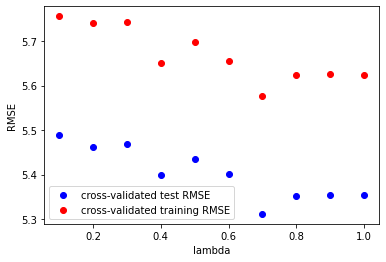

In [96]:
#scatter plot
for i in RMSE_LAM.keys():
    plt.scatter(i, RMSE_LAM[i][0], color="blue")
    plt.scatter(i, RMSE_LAM[i][1], color="red")

plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.legend(['cross-validated test RMSE', 'cross-validated training RMSE'], loc='best')
plt.show()


In [97]:
# train a new model using all of your training data (80%) with that value of lambda minimizes your cross-validated (test) RMSE

alpha, beta_array, _, _ = multivariate_ols_regularized(X_train, y_train, 0.01, 100000, lam = 0.7)
y_predict_test = alpha + X_test.dot(beta_array) # predicted y value of test data

print('========== RMSE of 20% test data ==========')
print(compute_rmse(y_predict_test, y_test))

========== RMSE of 20% test data ==========
6.2576454800494945


1. According to the result of cross-validation, the test set gets the lowest RMSE when lambda = 0.7. 
2. However, compared with the result of 4.3, when training the new model using all of the training data (80%) using lambda =0.7, the result of the test (20%) RMSE (6.2576) is higher than using lambda = 0.5 (6.0374). 
3. Compared with 4.2, the RMSE of test data using model lambda =0.7 is still higher than using the model without regularization lambda =0.5.
4. Compared with 3.3, in which the model is not regularized and with fewer features (RMSE = 6.5749), the test RMSE (6.2576) in 4.4 is smaller. 
5. The RMSE here is greater than the RMSE of knn I got in ps3, however it is hard to compare the two RMSE because the choice of features are not the same. 

###  Extra Credit 2: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in neural network training. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1. Use mini-batch gradient descent in this implementation. In summary for each parameter (in our case one intercept and three slopes) the update step of the gradient (in this example $\beta_j$) at iteration $k$ of the GD algorithm becomes:

$$\beta_j=\beta_j -\frac{R}{\sqrt{G^{(k)}_j}}\frac{\partial J(\alpha,\beta_1,\ldots)}{\partial \beta_j}$$ where
$G^{(k)}_j=\sum_{i=1}^{k} (\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j})^2$ and $R$ is your learning rate. The notation $\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j}$ corresponds to the value of the gradient at iteration $(i)$. Essentially we are "storing" information about previous iteration gradients. Doing that we effectively decrease the learning rate slower when a feature $x_i$ is sparse (i.e. has many zero values which would lead to zero gradients). Although this method is not necessary for our regression problem, it is good to be familiar with these methods as they are widely used in neural network training.  

In [ ]:
# Your code here

*Discuss your results here*